In [1]:
from Network import PINN, NetworkTrainer
from Physics import *
from Physics import NVS

ModuleNotFoundError: No module named 'Network'

In [ ]:
model0 = PINN(width=64, length=12, is_steady=True)

## Define Physical Space

torch.Size([38800])


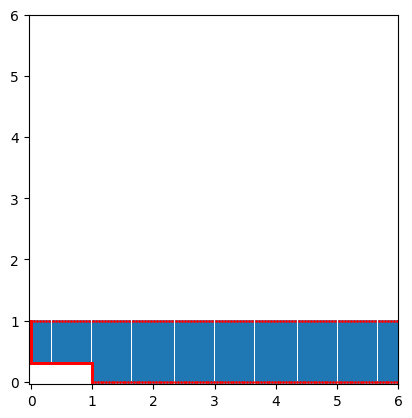

In [ ]:
import matplotlib.pyplot as plt
from PointSampling import Bound, PhysicsBound
import torch

bound_list = []
def func1(x):
    return 1*torch.ones_like(x)
bound_list.append(Bound([0,10], func1, True))
def func2(x):
    return 0*torch.ones_like(x)
bound_list.append(Bound([1,10], func2, False))
def func3(x):
    return 0.3*torch.ones_like(x)
bound_list.append(Bound([0,1], func3, False))

def func4(y):
    return 0*torch.ones_like(y)
bound_list.append(Bound([0.3001,0.9999], func4, False, ref_axis='y'))
def func5(y):
    return 10*torch.ones_like(y)
bound_list.append(Bound([0,1], func5, True, ref_axis='y'))
def func6(y):
    return 1*torch.ones_like(y)
bound_list.append(Bound([0,0.3], func6, False, ref_axis='y'))


X, Y = Bound.sampling_area(bound_list, 200, [0,10], [0,1])
print(X.shape)
xxx = X
yyy = Y
plt.figure()
plt.scatter(X,Y,s=1)
for bound in bound_list:
    x,y = bound.sampling_line(200)
    plt.scatter(x,y,s=1, color='red')
plt.xlim(-0.04,6)
plt.ylim(-0.04,6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### Define Boundary Conditions and PDE Area

In [ ]:
physics_cond_list = [
    {'u': 0.0, 'v': 0.0},  # func1: top wall (y=1) -> No-slip
    {'u': 0.0, 'v': 0.0},  # func2: bottom wall (y=0) -> No-slip
    {'u': 0.0, 'v': 0.0},  # func3: inlet (x=0) -> Uniform inflow
    {'u': 0.1, 'v': 0.0},
    {'p': 0.0},             # func4: outlet (x=2) -> Zero pressure
    {'u': 0.0, 'v': 0.0}
]
boundary_conditions_list = []
for i, bound in enumerate(bound_list):
    boundary_conditions_list.append(PhysicsBound.define_boundary_condition(bound, physics_cond_list[i]))

from Physics import NVS
area_physics_bound = PhysicsBound.define_pde_area(bound_list=bound_list, sampling_range_x=[0,10], sampling_range_y=[0,1], PDE_class=NVS(is_steady=True))

### Sampling points

In [ ]:
def uniform_sampling():
    for bc in boundary_conditions_list:
        bc.sampling_collocation_points(1000)
    area_physics_bound.sampling_collocation_points(100)

def random_sampling():
    for bc in boundary_conditions_list:
        bc.sampling_collocation_points(400,True)
    area_physics_bound.sampling_collocation_points(40,True)

## Define Physics

In [ ]:
loss_fn = torch.nn.MSELoss()
def get_loss():

    random_sampling()

    #bc_loss
    bc_loss = 0
    for bc in boundary_conditions_list:
        bc_loss += bc.calc_loss(model0, loss_fn)

    #pde_loss
    pde_loss = area_physics_bound.calc_loss(model0)

    #total_loss
    total_loss = bc_loss + pde_loss
    
    return {"bc_loss": bc_loss, "pde_loss": pde_loss, "total_loss": total_loss}

In [ ]:
model1 = NetworkTrainer.train_adam(model=model0, calc_loss=get_loss, learning_rate=0.001, epochs=1500, print_every=100)

epoch 1, total_loss: 0.02887, bc_loss: 0.02887, pde_loss: 0.00000
epoch 101, total_loss: 0.00127, bc_loss: 0.00108, pde_loss: 0.00019
epoch 201, total_loss: 0.00087, bc_loss: 0.00078, pde_loss: 0.00009
epoch 301, total_loss: 0.00067, bc_loss: 0.00066, pde_loss: 0.00002
epoch 401, total_loss: 0.00106, bc_loss: 0.00105, pde_loss: 0.00001
epoch 501, total_loss: 0.00082, bc_loss: 0.00079, pde_loss: 0.00003
epoch 601, total_loss: 0.00060, bc_loss: 0.00052, pde_loss: 0.00008
epoch 701, total_loss: 0.00099, bc_loss: 0.00099, pde_loss: 0.00000
epoch 801, total_loss: 0.00027, bc_loss: 0.00027, pde_loss: 0.00001
epoch 901, total_loss: 0.00029, bc_loss: 0.00029, pde_loss: 0.00001
epoch 1001, total_loss: 0.00095, bc_loss: 0.00032, pde_loss: 0.00064
epoch 1101, total_loss: 0.00042, bc_loss: 0.00035, pde_loss: 0.00007
epoch 1201, total_loss: 0.00034, bc_loss: 0.00034, pde_loss: 0.00000
epoch 1301, total_loss: 0.00139, bc_loss: 0.00094, pde_loss: 0.00044
epoch 1401, total_loss: 0.00126, bc_loss: 0.00

In [ ]:
def random_sampling():
    for bc in boundary_conditions_list:
        bc.sampling_collocation_points(10000,True)
    area_physics_bound.sampling_collocation_points(150,True)

In [ ]:
model2 = NetworkTrainer.train_adam(model=model1, calc_loss=get_loss, learning_rate=0.0001, epochs=5000, print_every=100)

epoch 1501, total_loss: 0.00167, bc_loss: 0.00165, pde_loss: 0.00002
epoch 1601, total_loss: 0.00054, bc_loss: 0.00050, pde_loss: 0.00005
epoch 1701, total_loss: 0.00051, bc_loss: 0.00045, pde_loss: 0.00006
epoch 1801, total_loss: 0.00054, bc_loss: 0.00052, pde_loss: 0.00002
epoch 1901, total_loss: 0.00047, bc_loss: 0.00037, pde_loss: 0.00009
epoch 2001, total_loss: 0.00047, bc_loss: 0.00033, pde_loss: 0.00014
epoch 2101, total_loss: 0.00038, bc_loss: 0.00032, pde_loss: 0.00006
epoch 2201, total_loss: 0.00052, bc_loss: 0.00033, pde_loss: 0.00019
epoch 2301, total_loss: 0.00037, bc_loss: 0.00033, pde_loss: 0.00004
epoch 2401, total_loss: 0.00037, bc_loss: 0.00032, pde_loss: 0.00005
epoch 2501, total_loss: 0.00035, bc_loss: 0.00028, pde_loss: 0.00007
epoch 2601, total_loss: 0.00039, bc_loss: 0.00029, pde_loss: 0.00009
epoch 2701, total_loss: 0.00031, bc_loss: 0.00027, pde_loss: 0.00004
epoch 2801, total_loss: 0.00031, bc_loss: 0.00026, pde_loss: 0.00006
epoch 2901, total_loss: 0.00033, b

# Visualization

In [ ]:
from Utility import *
import numpy as np
area_physics_bound.sampling_collocation_points(400)
X,Y,U,V,P,T = area_physics_bound._process_model(model2)
residual = area_physics_bound._get_pde_residual_sum(model2)
X,Y,U,V,P,residual = torch_to_numpy([X,Y,U,V,P,residual])
V_size = np.sqrt(U**2+V**2)


In [ ]:
print(P.shape,X.shape)

(155200, 1) (155200, 1)


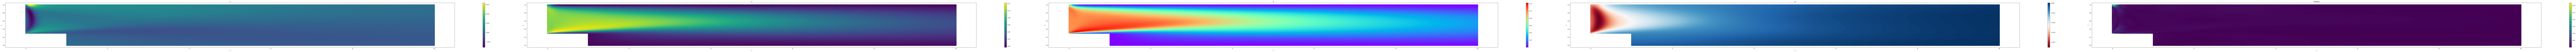

In [ ]:
from Visualize import Visualization
import numpy as np
fig, axes = plt.subplots(1,5, figsize=(6*5*10,6))
s =50
Visualization.colorplot(X.flatten(),Y.flatten(),V.flatten(),axes[0],'v','viridis',s)
Visualization.colorplot(X.flatten(),Y.flatten(),U.flatten(),axes[1],'u','viridis',s)
Visualization.colorplot(X.flatten(),Y.flatten(),V_size.flatten(),axes[2],'V','rainbow',s)
Visualization.colorplot(X.flatten(),Y.flatten(),P.flatten(),axes[3],'p','RdBu',s)
Visualization.colorplot(X.flatten(),Y.flatten(),residual.flatten(),axes[4],'residual','viridis',s)

plt.tight_layout()
plt.show()

In [ ]:
boundary_conditions_list[3].sampling_collocation_points(200)
boundary_conditions_list[3].PDE = NVS()
X,Y,U,V,P,T = boundary_conditions_list[3]._process_model(model1)
X,Y,U,V,P = torch_to_numpy([X,Y,U,V,P])


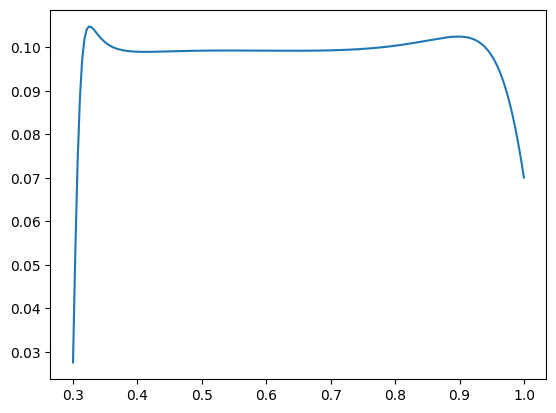

In [ ]:
plt.plot(Y.flatten(), U.flatten())
plt.show()

In [ ]:
fig.savefig('backward_stepflow_steady.png')